# The Problem

In this notebook we will attempt to classify binding site receptors, given a set of features that the Lovely Bruha- I mean... Inday, from Siquijor, has provided.

## Load the Data

In [1]:
import pandas as pd

In [2]:
ps = pd.read_csv('data/ps_merged_edited.csv', sep =';')
ps.head()

,Target,ID,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,G protein,A0SPI0,Other toxin,40,3982.60,99.565,0.0,4.3241,0.552,0.000,...,-0.546,0,0,0,0,0,1.374,0,0,0.884
1,voltage-gated potassium channel,B3A0L5,Other toxin,28,3185.75,113.777,3.0,8.2380,0.664,0.000,...,0.216,0,0,0,0,0,0.914,0,2,1.435
2,voltage-gated sodium channel,B3EWF9,Other toxin,42,4554.24,108.434,2.0,7.9167,0.000,0.965,...,-0.405,0,0,0,0,0,0.818,0,0,0.806
3,nicotinic acetylcholine receptor,B3EWH2,Other toxin,21,2540.92,120.996,4.5,12.2435,0.000,0.839,...,0.000,0,0,0,0,0,0.892,0,0,0.443
4,voltage-gated sodium channel,B3EWN0,Other toxin,34,3976.53,116.957,0.0,6.0544,0.000,0.640,...,-0.810,0,0,0,0,0,0.321,0,1,1.429


In [3]:
ps.shape

(709, 2140)

In [4]:
y = ps['Target']

In [5]:
X = ps
X = X.drop('Target', axis=1)
X.head() # set features as everything except the target column

,ID,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,A_Number,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,A0SPI0,Other toxin,40,3982.60,99.565,0.0,4.3241,0.552,0.000,11,...,-0.546,0,0,0,0,0,1.374,0,0,0.884
1,B3A0L5,Other toxin,28,3185.75,113.777,3.0,8.2380,0.664,0.000,1,...,0.216,0,0,0,0,0,0.914,0,2,1.435
2,B3EWF9,Other toxin,42,4554.24,108.434,2.0,7.9167,0.000,0.965,0,...,-0.405,0,0,0,0,0,0.818,0,0,0.806
3,B3EWH2,Other toxin,21,2540.92,120.996,4.5,12.2435,0.000,0.839,0,...,0.000,0,0,0,0,0,0.892,0,0,0.443
4,B3EWN0,Other toxin,34,3976.53,116.957,0.0,6.0544,0.000,0.640,0,...,-0.810,0,0,0,0,0,0.321,0,1,1.429


There are 2139 features in this dataset.

## Preprocessing

* Label Encoding
* Standardization
* PCA (dimensionality reduction)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X['Organism']) # converts the labels 'Conopeptide' and 'Other toxin' into binary labels: 1 and 0
le.classes_

array(['Conopeptide', 'Other toxin'], dtype=object)

In [7]:
le.transform(X['Organism'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [8]:
X['Organism'] = le.transform(X['Organism'])

In [9]:
X.head()

,ID,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,A_Number,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,A0SPI0,1,40,3982.60,99.565,0.0,4.3241,0.552,0.000,11,...,-0.546,0,0,0,0,0,1.374,0,0,0.884
1,B3A0L5,1,28,3185.75,113.777,3.0,8.2380,0.664,0.000,1,...,0.216,0,0,0,0,0,0.914,0,2,1.435
2,B3EWF9,1,42,4554.24,108.434,2.0,7.9167,0.000,0.965,0,...,-0.405,0,0,0,0,0,0.818,0,0,0.806
3,B3EWH2,1,21,2540.92,120.996,4.5,12.2435,0.000,0.839,0,...,0.000,0,0,0,0,0,0.892,0,0,0.443
4,B3EWN0,1,34,3976.53,116.957,0.0,6.0544,0.000,0.640,0,...,-0.810,0,0,0,0,0,0.321,0,1,1.429


In [10]:
le.fit(X['ID'])
len(le.classes_)

709

This result means there are 709 unique rows in the ID column. The original size of the dataset has 709 rows, therefore every entry of the ID column is unique. 

I will remove this column because I don't really know how to train a model that accepts strings as its training and testing data, aside from using label encoding beforehand.

In [11]:
X = X.drop('ID', axis=1) # remove the ID feature from the dataframe
X.head()

,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,A_Number,A_Mole%,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,1,40,3982.60,99.565,0.0,4.3241,0.552,0.000,11,27.500,...,-0.546,0,0,0,0,0,1.374,0,0,0.884
1,1,28,3185.75,113.777,3.0,8.2380,0.664,0.000,1,3.571,...,0.216,0,0,0,0,0,0.914,0,2,1.435
2,1,42,4554.24,108.434,2.0,7.9167,0.000,0.965,0,0.000,...,-0.405,0,0,0,0,0,0.818,0,0,0.806
3,1,21,2540.92,120.996,4.5,12.2435,0.000,0.839,0,0.000,...,0.000,0,0,0,0,0,0.892,0,0,0.443
4,1,34,3976.53,116.957,0.0,6.0544,0.000,0.640,0,0.000,...,-0.810,0,0,0,0,0,0.321,0,1,1.429


In [12]:
X.head()

,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,A_Number,A_Mole%,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,1,40,3982.60,99.565,0.0,4.3241,0.552,0.000,11,27.500,...,-0.546,0,0,0,0,0,1.374,0,0,0.884
1,1,28,3185.75,113.777,3.0,8.2380,0.664,0.000,1,3.571,...,0.216,0,0,0,0,0,0.914,0,2,1.435
2,1,42,4554.24,108.434,2.0,7.9167,0.000,0.965,0,0.000,...,-0.405,0,0,0,0,0,0.818,0,0,0.806
3,1,21,2540.92,120.996,4.5,12.2435,0.000,0.839,0,0.000,...,0.000,0,0,0,0,0,0.892,0,0,0.443
4,1,34,3976.53,116.957,0.0,6.0544,0.000,0.640,0,0.000,...,-0.810,0,0,0,0,0,0.321,0,1,1.429


## Principal Component Analysis (PCA)

Principal Component Analysis is a powerful unsupervised method for dimensionality reduction in data. 

Here, we will apply PCA using scikit-learn to compress our high dimensional dataset.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
p = pca.transform(X) # transform features into their principal components

In [14]:
print(pca.explained_variance_ratio_)

[ 0.96321576  0.00974821  0.00313243]


This result is potentially very misleading, as we had not performed feature scaling beforehand.

### Feature Scaling

We will repeat PCA, but this time we will first transform our data using standardization on our data. This results in a matrix where the mean is zero and the variance is equal to 1. 

I've read that normalizing our dataset before PCA is important, and that if you don't perform feature scaling before PCA, your explained variance ratio could look misleadingly better. [source](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

In [15]:
from sklearn.preprocessing import StandardScaler

# use standardization
rescaledX = StandardScaler().fit_transform(X)
X = pd.DataFrame(data = rescaledX, columns = X.columns)
X.head()

,Organism,Residues,Molecular weight,Average Residue Weight,Charge,Isoelectric Point,Probability of expression in inclusion bodies,Improbability of expression in inclusion bodies,A_Number,A_Mole%,...,MoreauBrotoAuto_Steric26,472,473,470,471,476,GearyAuto_Steric15,474,475,GearyAuto_Steric14
0,1.059601,0.952603,0.607909,-1.873293,-0.949765,-1.380171,0.461511,-1.029488,7.452836,4.770921,...,-1.014347,-0.359257,-0.263649,0.0,-0.211736,-0.161398,0.537699,-0.170375,-0.391768,-0.111290
1,1.059601,-0.114232,-0.035393,0.582293,0.312829,0.553227,0.736067,-1.029488,-0.239784,-0.238019,...,0.201166,-0.359257,-0.263649,0.0,-0.211736,-0.161398,-0.045425,-0.170375,5.163508,0.663043
2,1.059601,1.130409,1.069397,-0.340884,-0.108036,0.394511,-0.891656,1.297699,-1.009046,-0.985519,...,-0.789429,-0.359257,-0.263649,0.0,-0.211736,-0.161398,-0.167120,-0.170375,-0.391768,-0.220905
3,1.059601,-0.736553,-0.555968,1.829611,0.944125,2.531875,-0.891656,0.993838,-1.009046,-0.985519,...,-0.143389,-0.359257,-0.263649,0.0,-0.211736,-0.161398,-0.073313,-0.170375,-0.391768,-0.731038
4,1.059601,0.419186,0.603009,1.131742,-0.949765,-0.525433,-0.891656,0.513931,-1.009046,-0.985519,...,-1.435470,-0.359257,-0.263649,0.0,-0.211736,-0.161398,-0.797148,-0.170375,2.385870,0.654612


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
p = pca.transform(X) # transform features into their principal components

In [17]:
print(pca.explained_variance_ratio_)

[ 0.10382275  0.03400666  0.02693934]


In [18]:
print(pca.components_)

[[-0.02734919 -0.06867146 -0.06892707 ..., -0.00451365 -0.01481531
  -0.00397286]
 [-0.02962324  0.00969758  0.00136707 ..., -0.00832043 -0.0097438
   0.04134945]
 [ 0.00799582  0.01433378  0.01240991 ..., -0.00592535 -0.00638449
  -0.05410024]]


In [19]:
p.shape

(709, 3)

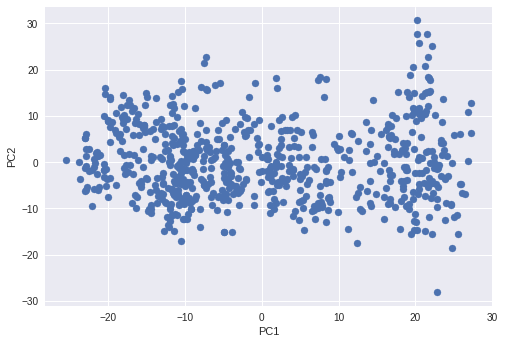

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.scatter(p[:, 0], p[:, 1]) # plot the principal components
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

The amount of variance in PC1 and PC2 are 10% and 3% respectively.

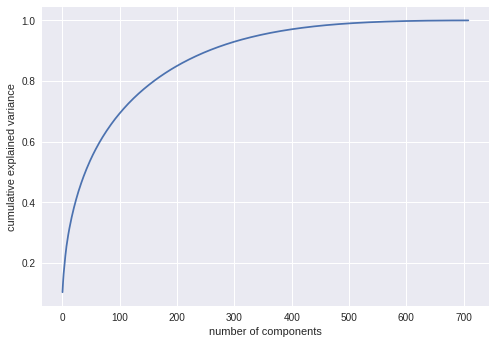

In [21]:
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

We can figure out how much information we have lost after our compression by looking at the variance. 

The graph above shows that our problem loses a lot of information (as measured by the explained variance) and that'd need about 300 components to retain 90% of the variance. 

Let's see what our data looks like if we want to only keep 95% of the variance. Here we throw away 5% of the variance, which compresses our data. We see that we would need 342 principal components to retain at least 95% of the variance in our dataset.

In [22]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(709, 2138)
(709, 342)
